In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance_matrix
import pandas as pd

In [2]:
def k_means(X, K) :
    nrow = X.shape[0]
    ncol = X.shape[1]
    
    initial_centroids = np.random.choice(nrow, K, replace = False)
    centroids = X[initial_centroids]
    
    centroids_old = np.zeros((K, ncol))
    cluster_assignments = np.zeros(nrow)
    
    while (centroids_old != centroids).any() :
        centroids_old = centroids.copy();
        dist_mat = distance_matrix(X, centroids, p = 2)
        
        for i in np.arange(nrow) :
            d = dist_mat[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]
            cluster_assignments[i] = closest_centroid
            
        for k in np.arange(K) :
            Xk = X[cluster_assignments == k]
            centroids[k] = np.apply_along_axis(np.mean, axis = 0, arr = Xk)
    
    return (centroids, cluster_assignments)


In [3]:

def predict(X, centroids) :
    nrow = X.shape[0]
    cluster_assignments = np.zeros(nrow)
    dist_mat = distance_matrix(X, centroids)
    for i in np.arange(nrow) :
        d = dist_mat[i]
        closest_centroid = (np.where(d == np.min(d)))[0][0]
        cluster_assignments[i] = closest_centroid
        
    return cluster_assignments

In [8]:
df = pd.read_csv('Iris.csv')
df.describe()
X = np.column_stack((df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm']))

K = 3
k_means_result = k_means(X, K)

centroids = k_means_result[0]
cluster_assignments = k_means_result[1]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


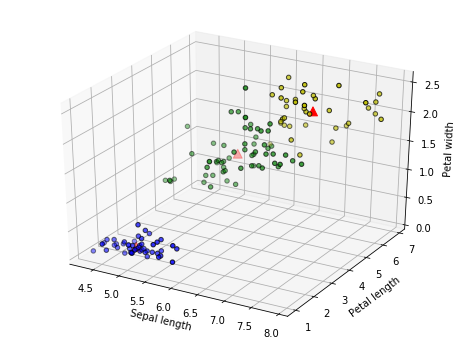

In [5]:
colors = ['y', 'g', 'b']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

fig = plt.figure("KMeans", figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], color = cluster_assignments, edgecolor = 'k')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c = 'r', marker = '^', s = 80)

plt.show()

In [9]:
rows = list(range(25, 50))
df = df.drop(df.index[rows])
rows = list(range(50, 75))
df = df.drop(df.index[rows])
rows = list(range(75, 100))
df = df.drop(df.index[rows])

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,63.000000,5.872000,3.061333,3.804000,1.212000
std,41.735978,0.856858,0.468434,1.814986,0.769514
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,19.500000,5.100000,2.800000,1.550000,0.300000
50%,63.000000,5.800000,3.000000,4.500000,1.400000
75%,106.500000,6.450000,3.350000,5.100000,1.800000
max,125.000000,7.700000,4.400000,6.900000,2.500000
